# Preprocessing

## Import Libraries


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.svm import SVC

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time
import joblib


**Penjelasan**:  
Cell ini mengimpor semua library yang diperlukan untuk preprocessing data, pembangunan model machine learning, evaluasi performa, visualisasi, dan pengelolaan waktu. Library seperti `sklearn` digunakan untuk model dan preprocessing, `pandas` untuk manipulasi data, `matplotlib` dan `seaborn` untuk visualisasi, serta `joblib` untuk menyimpan model.

**Kegunaan**:  
- Menyediakan alat untuk seluruh pipeline machine learning, mulai dari preprocessing hingga visualisasi hasil.
- Memastikan semua dependensi tersedia sebelum menjalankan kode.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Penjelasan**:  
Cell ini menghubungkan Google Drive ke lingkungan Google Colab untuk mengakses dataset atau menyimpan file hasil seperti model yang telah dilatih.

**Kegunaan**:  
- Memungkinkan akses ke dataset yang disimpan di Google Drive.
- Menyediakan lokasi penyimpanan untuk output seperti model yang disimpan.


## Set Params


In [ ]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

**Penjelasan**:  
Cell ini mengatur parameter default untuk visualisasi menggunakan `matplotlib` dan `seaborn`. Ukuran figure, ukuran font, palet warna, dan gaya plot diatur untuk memastikan visualisasi yang konsisten dan mudah dibaca.

**Kegunaan**:  
- Membuat visualisasi seperti histogram atau confusion matrix lebih jelas dan estetis.
- Menstandardisasi tampilan plot di seluruh notebook.

## Load Dataset


In [ ]:
# Loading the dataset.
df = pd.read_csv("/content/drive/MyDrive/ML/Dataset/kaggle_bot_accounts.csv")
df.head()

,Unnamed: 0,NAME,GENDER,EMAIL_ID,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,REGISTRATION_IPV4,REGISTRATION_LOCATION,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,ISBOT
0,0,Johnny KerrThomas,Male,jacksonalan@example.com,False,53.0,87.0,5.0,3.0,124.0,NaN,81.88.75.170,Argentina,16.0,10.0,3.0,NaN
1,1,Dwayne LarsenLara,Male,calvin80@example.com,True,16.0,67.0,5.0,NaN,26.0,24.97,NaN,New Zealand,14.0,5.0,2.0,NaN
2,2,NaN,Male,qbrown@example.net,True,44.0,81.0,4.0,17.0,125.0,7.75,159.202.103.178,Costa Rica,16.0,4.0,0.0,False
3,3,Russell SimmonsPhillips,Male,kimberlywagner@example.com,True,23.0,114.0,5.0,24.0,67.0,13.40,196.11.132.51,Italy,21.0,10.0,1.0,False
4,4,Jamie WilsonMartinez,Female,shaunbrooks@example.com,False,46.0,112.0,2.0,12.0,63.0,24.83,159.196.199.20,Belgium,10.0,6.0,2.0,False


**Penjelasan**:  
Cell ini memuat dataset `kaggle_bot_accounts.csv` dari Google Drive ke dalam DataFrame menggunakan `pandas` dan menampilkan 5 baris pertama untuk inspeksi awal.

**Kegunaan**:  
- Memulai analisis dengan memuat data ke dalam memori.
- Memberikan gambaran awal tentang struktur dan isi dataset.


## Check columns


In [ ]:
# Drop unused column
df = df.drop('Unnamed: 0', axis=1)


**Penjelasan**:  
Cell ini menghapus kolom `Unnamed: 0`, yang biasanya merupakan indeks yang tidak relevan atau tidak diperlukan untuk analisis.

**Kegunaan**:  
- Mengurangi kebisingan dalam dataset dengan menghapus kolom yang tidak memberikan informasi.
- Membersihkan data untuk analisis lebih lanjut.


In [ ]:
for col in df.columns:
    print(col)

NAME
GENDER
EMAIL_ID
IS_GLOGIN
FOLLOWER_COUNT
FOLLOWING_COUNT
DATASET_COUNT
CODE_COUNT
DISCUSSION_COUNT
AVG_NB_READ_TIME_MIN
REGISTRATION_IPV4
REGISTRATION_LOCATION
TOTAL_VOTES_GAVE_NB
TOTAL_VOTES_GAVE_DS
TOTAL_VOTES_GAVE_DC
ISBOT


### Column informations

1. **NAME**: The name of the individual.
2. **GENDER**: The gender of the individual, either male or female.
3. **EMAIL_ID**: The email address of the individual.
4. **IS_GLOGIN**: A boolean indicating whether the individual used Google login to register or not.
5. **FOLLOWER_COUNT**: The number of followers the individual has.
6. **FOLLOWING_COUNT**: The number of individuals the individual is following.
7. **DATASET_COUNT**: The number of datasets the individual has created.
8. **CODE_COUNT**: The number of notebooks the individual has created.
9. **DISCUSSION_COUNT**: The number of discussions the individual has participated in.
10. **AVG_NB_READ_TIME_MIN**: The average time spent reading notebooks in minutes.
11. **REGISTRATION_IPV4**: The IP address used to register.
12. **REGISTRATION_LOCATION**: The location from where the individual registered.
13. **TOTAL_VOTES_GAVE_NB**: The total number of votes the individual has given to notebooks.
14. **TOTAL_VOTES_GAVE_DS**: The total number of votes the individual has given to datasets.
15. **TOTAL_VOTES_GAVE_DC**: The total number of votes the individual has given to discussion comments.
16. **ISBOT**: A boolean indicating whether the individual is a bot or not.


In [ ]:
# Remove probable unrelated columns
df = df.drop('NAME', axis=1)
df = df.drop('EMAIL_ID', axis=1)
df = df.drop('REGISTRATION_LOCATION', axis=1)
df = df.drop('REGISTRATION_IPV4', axis=1)


**Penjelasan**:  
Cell ini menghapus kolom yang dianggap tidak relevan untuk prediksi, seperti `NAME`, `EMAIL_ID`, `REGISTRATION_LOCATION`, dan `REGISTRATION_IPV4`, karena kemungkinan tidak berkontribusi pada deteksi akun bot.

**Kegunaan**:  
- Mengurangi dimensi dataset untuk meningkatkan efisiensi model.
- Menghilangkan fitur yang tidak relevan untuk fokus pada fitur yang lebih bermakna.

## Check null values & duplicated rows


In [ ]:
df.shape

(1321188, 12)

In [ ]:
df.duplicated().sum()


np.int64(684)

**Penjelasan**:  
Cell ini menghitung jumlah baris duplikat dalam dataset.

**Kegunaan**:  
- Mengidentifikasi apakah ada data yang redundan.
- Memastikan dataset bersih dari duplikasi yang dapat memengaruhi hasil model.


In [ ]:
df.isna().sum()


,0
GENDER,77879
IS_GLOGIN,77916
FOLLOWER_COUNT,77712
FOLLOWING_COUNT,78445
DATASET_COUNT,78567
CODE_COUNT,77926
DISCUSSION_COUNT,77722
AVG_NB_READ_TIME_MIN,78316
TOTAL_VOTES_GAVE_NB,77705
TOTAL_VOTES_GAVE_DS,77934


**Penjelasan**:  
Cell ini menampilkan jumlah nilai yang hilang (null) untuk setiap kolom.

**Kegunaan**:  
- Mengidentifikasi kolom dengan data yang hilang untuk penanganan lebih lanjut.
- Membantu menentukan strategi pengisian atau penghapusan nilai null.



In [ ]:
# Displaying columns with missing values using sum and percentage
missing_values = df.isnull().sum().sort_values(ascending = True)
percent = ((df.isnull().sum()/df.isnull().count()) * 100) .sort_values(ascending=True).round(2)
missing_data = pd.concat([missing_values, percent], axis = 1, keys = ["Values", "Percentage"])
missing_data

,Values,Percentage
TOTAL_VOTES_GAVE_NB,77705,5.88
FOLLOWER_COUNT,77712,5.88
DISCUSSION_COUNT,77722,5.88
GENDER,77879,5.89
IS_GLOGIN,77916,5.90
CODE_COUNT,77926,5.90
TOTAL_VOTES_GAVE_DS,77934,5.90
TOTAL_VOTES_GAVE_DC,78030,5.91
AVG_NB_READ_TIME_MIN,78316,5.93
FOLLOWING_COUNT,78445,5.94


**Penjelasan**:  
Cell ini menghitung jumlah dan persentase nilai yang hilang untuk setiap kolom, lalu menampilkannya dalam format tabel yang terurut.

**Kegunaan**:  
- Memberikan gambaran yang lebih jelas tentang distribusi nilai yang hilang.
- Membantu dalam pengambilan keputusan untuk menangani nilai null (misalnya, mengisi atau menghapus).


In [ ]:
df.dtypes

,0
GENDER,object
IS_GLOGIN,object
FOLLOWER_COUNT,float64
FOLLOWING_COUNT,float64
DATASET_COUNT,float64
CODE_COUNT,float64
DISCUSSION_COUNT,float64
AVG_NB_READ_TIME_MIN,float64
TOTAL_VOTES_GAVE_NB,float64
TOTAL_VOTES_GAVE_DS,float64


### Fill null values with mean or mode


In [ ]:
for col in df.columns:
    if df[col].isna().sum():
        # If column is float, replace with mean
        if df[col].dtype == 'float64':
            df[col] = df[col].fillna(
                round(df[col].mean())
            )

        # If column is 'GENDER' or 'IS_GLOGIN', replace with mode
        elif col == 'GENDER' or col == 'IS_GLOGIN':
            df[col] = df[col].fillna(
                df[col].mode()[0]
            ).infer_objects(copy=False)

<ipython-input-13-71337abc335d>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(


**Penjelasan**:  
Cell ini mengisi nilai yang hilang dengan strategi berbeda berdasarkan tipe data:
- Kolom numerik (`float64`) diisi dengan rata-rata (mean).
- Kolom kategorikal (`GENDER`, `IS_GLOGIN`) diisi dengan modus.

**Kegunaan**:  
- Menangani nilai yang hilang untuk memastikan dataset lengkap.
- Menjaga integritas data dengan strategi pengisian yang sesuai dengan tipe data.


In [ ]:
df.isna().sum()

,0
GENDER,0
IS_GLOGIN,0
FOLLOWER_COUNT,0
FOLLOWING_COUNT,0
DATASET_COUNT,0
CODE_COUNT,0
DISCUSSION_COUNT,0
AVG_NB_READ_TIME_MIN,0
TOTAL_VOTES_GAVE_NB,0
TOTAL_VOTES_GAVE_DS,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321188 entries, 0 to 1321187
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   GENDER                1321188 non-null  object 
 1   IS_GLOGIN             1321188 non-null  bool   
 2   FOLLOWER_COUNT        1321188 non-null  float64
 3   FOLLOWING_COUNT       1321188 non-null  float64
 4   DATASET_COUNT         1321188 non-null  float64
 5   CODE_COUNT            1321188 non-null  float64
 6   DISCUSSION_COUNT      1321188 non-null  float64
 7   AVG_NB_READ_TIME_MIN  1321188 non-null  float64
 8   TOTAL_VOTES_GAVE_NB   1321188 non-null  float64
 9   TOTAL_VOTES_GAVE_DS   1321188 non-null  float64
 10  TOTAL_VOTES_GAVE_DC   1321188 non-null  float64
 11  ISBOT                 1242688 non-null  object 
dtypes: bool(1), float64(9), object(2)
memory usage: 112.1+ MB


In [ ]:
df = df.dropna()
df.shape


(1242688, 12)

## Check statistical value of dataset


In [ ]:
df.describe().round(2)

,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC
count,1242688.00,1242688.00,1242688.00,1242688.00,1242688.00,1242688.00,1242688.00,1242688.00,1242688.00
mean,26.98,45.04,2.59,10.36,65.85,12.76,17.53,6.53,1.53
std,22.32,38.29,2.43,8.00,46.13,9.28,4.48,2.23,1.09
min,0.00,0.00,0.00,0.00,0.00,0.00,10.00,3.00,0.00
25%,2.00,3.00,0.00,1.00,13.00,1.98,14.00,5.00,1.00
50%,27.00,44.00,2.00,10.00,66.00,13.00,18.00,7.00,2.00
75%,46.00,77.00,5.00,17.00,105.00,20.59,21.00,8.00,2.00
max,70.00,120.00,7.00,25.00,150.00,29.99,25.00,10.00,3.00


**Penjelasan**:  
Cell ini menghitung statistik deskriptif (mean, std, min, max, dll.) untuk kolom numerik dan membulatkannya ke 2 desimal.

**Kegunaan**:  
- Memberikan wawasan tentang distribusi dan rentang nilai dalam dataset.
- Membantu mengidentifikasi anomali atau pola dalam data numerik.



### Check numerical data distributions


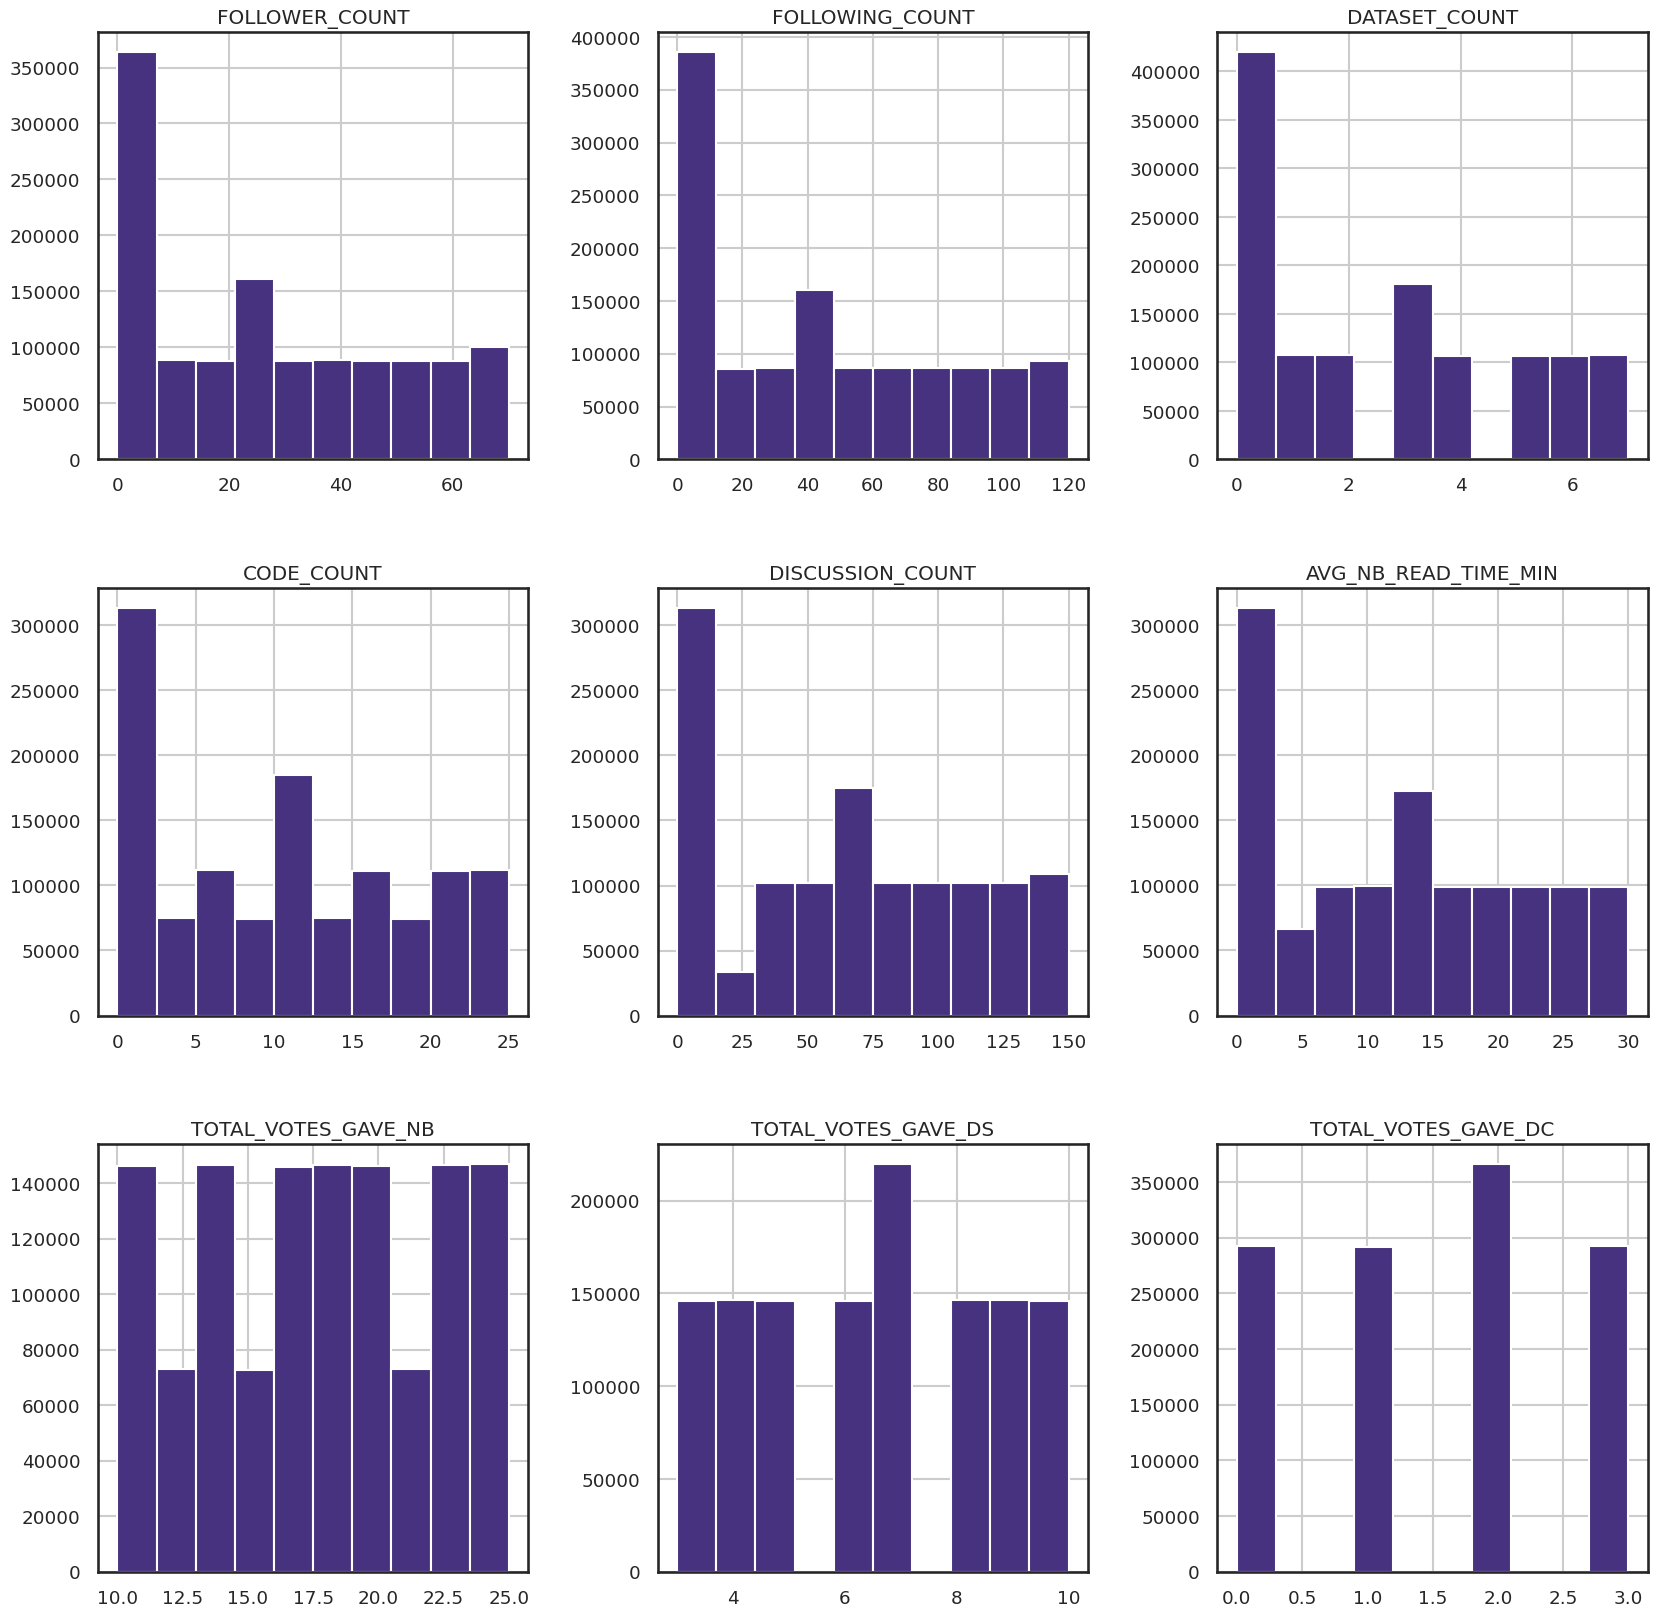

In [ ]:
df.hist(figsize=(20,20))
plt.show()

**Penjelasan**:  
Cell ini membuat histogram untuk setiap kolom numerik untuk memvisualisasikan distribusi data.

**Kegunaan**:  
- Membantu memahami distribusi fitur (misalnya, apakah data miring atau normal).
- Mengidentifikasi potensi outlier atau pola yang tidak biasa.



## check each label percentage from dataset


In [ ]:
print("Percentage of fake accounts is {:.2f}% and non-fake accounts is: {:.2f}%".format(
    df[df['ISBOT'] == True].shape[0] / df.shape[0]*100,
    df[df['ISBOT'] == False].shape[0] / df.shape[0]*100))

Percentage of fake accounts is 26.79% and non-fake accounts is: 73.21%


> It can be observed that the dataset is inbalanced (skewed towards non fake accounts).


**Penjelasan**:  
Cell ini menghitung dan menampilkan persentase akun bot (`ISBOT = True`) dan non-bot (`ISBOT = False`) dalam dataset.

**Kegunaan**:  
- Mengidentifikasi ketidakseimbangan kelas (class imbalance) dalam dataset.
- Memberikan informasi bahwa dataset condong ke akun non-bot, yang memerlukan penanganan khusus.

## Down sampling (balancing dataset)


In [ ]:
bot = df[df['ISBOT'] == True]
bot.shape

(332894, 12)

In [ ]:
not_bot = df[df['ISBOT'] == False]
not_bot.shape


(909794, 12)

**Penjelasan**:  
Cell ini memisahkan dataset menjadi dua subset: akun bot dan non-bot, lalu menampilkan ukuran masing-masing subset.

**Kegunaan**:  
- Memfasilitasi penanganan ketidakseimbangan kelas dengan memisahkan kelas mayoritas dan minoritas.
- Memberikan gambaran tentang jumlah data di setiap kelas.



In [ ]:
# Dealing with imbalanced dataset.
# Random under sampling.
not_bot_downsampled = resample(not_bot,
                                   replace=False,  # sample without replacement
                                   n_samples= bot.shape[0],  # to match minority class
                                   )  # reproducible results

**Penjelasan**:  
Cell ini melakukan undersampling pada kelas mayoritas (non-bot) agar jumlahnya sama dengan kelas minoritas (bot) menggunakan fungsi `resample`.

**Kegunaan**:  
- Menyeimbangkan dataset untuk mencegah bias model terhadap kelas mayoritas.
- Meningkatkan performa model pada kelas minoritas (bot).

### Combine the new dataset


In [ ]:
main_df = pd.concat([bot, not_bot_downsampled])

**Penjelasan**:  
Cell ini menggabungkan data bot dan non-bot yang telah diseimbangkan menjadi satu DataFrame baru (`main_df`).

**Kegunaan**:  
- Menyediakan dataset yang seimbang untuk pelatihan model.
- Memastikan kedua kelas memiliki representasi yang sama.

In [ ]:
main_df['ISBOT'].value_counts()

,count
ISBOT,
True,332894
False,332894


## Encoding dataset


In [ ]:
le = LabelEncoder()


In [ ]:
# Performing Label Encoding on the target variable.
main_df["ISBOT"] = le.fit_transform(main_df["ISBOT"])


**Penjelasan**:  
Cell ini menginisialisasi `LabelEncoder` dan mengubah kolom target `ISBOT` (True/False) menjadi nilai numerik (0/1).

**Kegunaan**:  
- Mengonversi label kategorikal menjadi format numerik yang dapat diproses oleh algoritma machine learning.
- Memastikan kolom target siap untuk pelatihan model.


In [ ]:
X = main_df.drop('ISBOT', axis=1) # feature
y = main_df['ISBOT'] # target

In [ ]:
# perform one-hot encoding on feature
X = pd.get_dummies(X)
X.head(10)

,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,GENDER_Female,GENDER_Male
5,False,2.0,2.0,0.0,0.0,0.0,0.62,18.0,9.0,2.0,False,True
7,False,2.0,1.0,0.0,0.0,6.0,1.85,21.0,3.0,1.0,True,False
15,False,0.0,2.0,0.0,0.0,10.0,1.32,23.0,8.0,2.0,False,True
20,False,0.0,3.0,0.0,0.0,4.0,0.83,19.0,9.0,1.0,True,False
25,False,2.0,0.0,0.0,1.0,4.0,1.49,15.0,9.0,0.0,False,True
27,False,2.0,2.0,0.0,0.0,7.0,0.96,11.0,7.0,2.0,False,True
30,False,2.0,2.0,3.0,10.0,1.0,0.60,25.0,6.0,3.0,False,True
31,False,0.0,2.0,0.0,0.0,0.0,0.40,18.0,6.0,2.0,False,True
33,False,0.0,0.0,0.0,10.0,7.0,13.00,19.0,8.0,0.0,False,True
39,False,0.0,0.0,0.0,10.0,11.0,0.36,14.0,5.0,1.0,False,True


**Penjelasan**:  
Cell ini memisahkan fitur (`X`) dan target (`y`), lalu melakukan one-hot encoding pada kolom kategorikal dalam `X` untuk mengubahnya menjadi kolom biner.

**Kegunaan**:  
- Menyiapkan fitur untuk pelatihan dengan mengonversi data kategorikal ke format numerik.
- Memastikan semua fitur dapat digunakan oleh model machine learning.



## Scaling


In [ ]:
scaler = MinMaxScaler()


In [ ]:
X_norm = scaler.fit_transform(X)
X = pd.DataFrame(X_norm, columns=X.columns)

X

,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,GENDER_Female,GENDER_Male
0,0.0,0.028571,0.016667,0.000000,0.00,0.000000,0.020674,0.533333,0.857143,0.666667,0.0,1.0
1,0.0,0.028571,0.008333,0.000000,0.00,0.040000,0.061687,0.733333,0.000000,0.333333,1.0,0.0
2,0.0,0.000000,0.016667,0.000000,0.00,0.066667,0.044015,0.866667,0.714286,0.666667,0.0,1.0
3,0.0,0.000000,0.025000,0.000000,0.00,0.026667,0.027676,0.600000,0.857143,0.333333,1.0,0.0
4,0.0,0.028571,0.000000,0.000000,0.04,0.026667,0.049683,0.333333,0.857143,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
665783,0.0,0.528571,0.275000,1.000000,0.64,0.253333,0.248750,0.600000,0.571429,0.666667,0.0,1.0
665784,0.0,0.685714,0.016667,0.142857,0.16,0.366667,0.273424,0.200000,0.571429,0.333333,1.0,0.0
665785,0.0,0.314286,0.475000,0.857143,0.36,0.326667,0.591531,0.400000,0.428571,0.000000,0.0,1.0
665786,1.0,0.357143,0.816667,0.571429,0.32,0.453333,0.773591,0.000000,0.714286,0.000000,1.0,0.0


**Penjelasan**:  
Cell ini menggunakan `MinMaxScaler` untuk menormalkan fitur ke rentang [0,1] dan mengubah hasilnya kembali ke DataFrame.

**Kegunaan**:  
- Menstandarisasi skala fitur untuk meningkatkan performa model, terutama untuk algoritma sensitif terhadap skala (misalnya, SVM).
- Memastikan semua fitur memiliki kontribusi yang seimbang.

# Train


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Penjelasan**:  
Cell ini membagi dataset menjadi data pelatihan (80%) dan pengujian (20%) menggunakan `train_test_split`.

**Kegunaan**:  
- Menyediakan data pelatihan untuk membangun model dan data pengujian untuk evaluasi.
- Menggunakan `random_state` untuk memastikan hasil yang dapat direproduksi.

In [ ]:
# For tracking all models' performance
all_models_results = []

**Penjelasan**:  
Cell ini membuat list kosong untuk menyimpan hasil evaluasi semua model yang akan diuji.

**Kegunaan**:  
- Memungkinkan perbandingan performa antar model.
- Menyimpan metrik evaluasi untuk analisis lebih lanjut.

### Helper functions


In [ ]:
# evaluate models function
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate the model and print results"""
    y_pred = model.predict(X_test)
    print(f"\n--- {model_name} Results ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return y_pred, {
        'model': model_name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }


**Penjelasan**:  
Cell ini mendefinisikan fungsi `evaluate_model` yang mengevaluasi model dengan metrik seperti akurasi, presisi, recall, dan F1-score, serta membuat visualisasi confusion matrix.

**Kegunaan**:  
- Menyediakan cara standar untuk mengevaluasi performa model.
- Memvisualisasikan hasil prediksi dalam bentuk confusion matrix untuk analisis lebih lanjut.

## Extra Trees



--- ExtraTreesClassifier Results ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66650
           1       1.00      1.00      1.00     66508

    accuracy                           1.00    133158
   macro avg       1.00      1.00      1.00    133158
weighted avg       1.00      1.00      1.00    133158



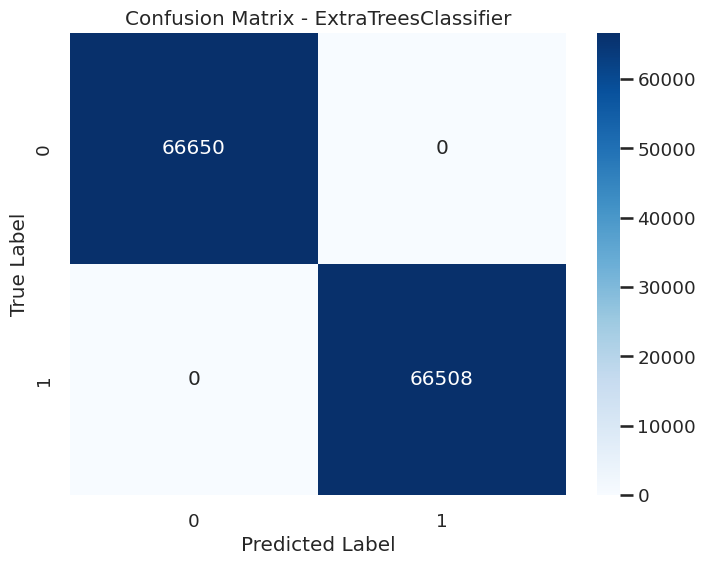

(array([1, 0, 0, ..., 1, 0, 1]),
 {'model': 'ExtraTreesClassifier',
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0})

In [ ]:
ET_model = ExtraTreesClassifier(random_state=42)
ET_model.fit(X_train, y_train)

evaluate_model(ET_model, X_test, y_test, 'ExtraTreesClassifier')


**Penjelasan**:  
Cell ini melatih model `ExtraTreesClassifier` pada data pelatihan dan mengevaluasinya pada data pengujian menggunakan fungsi `evaluate_model`.

**Kegunaan**:  
- Menguji performa awal model Extra Trees.
- Memberikan baseline untuk perbandingan dengan model lain atau setelah tuning.

[6.80175378e-02 1.34962772e-01 1.36039551e-01 1.08526762e-01
 1.30161192e-01 2.17989606e-01 2.04238545e-01 2.26452418e-05
 1.88166587e-05 1.40037277e-05 4.03864418e-06 4.53074780e-06]


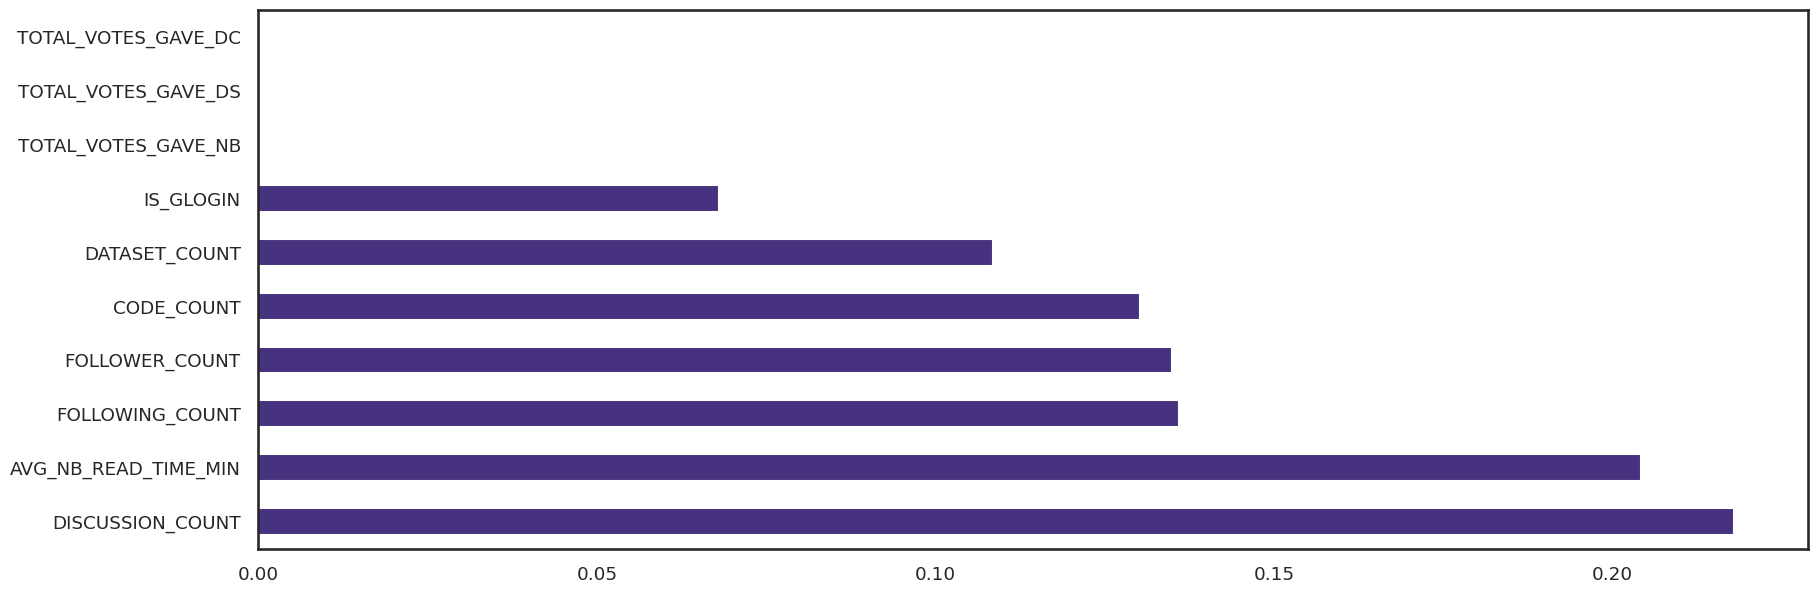

In [ ]:
print(ET_model.feature_importances_)
feat_importance = pd.Series(ET_model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind = 'barh')

plt.show()

**Penjelasan**:  
Cell ini menampilkan dan memvisualisasikan kepentingan fitur (feature importance) dari model Extra Trees, menunjukkan fitur mana yang paling berpengaruh dalam prediksi.

**Kegunaan**:  
- Membantu memahami fitur yang paling relevan untuk deteksi akun bot.
- Mendukung pengambilan keputusan untuk seleksi fitur di masa depan.

In [ ]:
ET_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

**Penjelasan**:  
Cell ini menampilkan parameter default dari model `ExtraTreesClassifier`.

**Kegunaan**:  
- Memberikan informasi tentang konfigurasi model awal.
- Membantu dalam perencanaan hyperparameter tuning.

### Hyperparameter tuning


In [ ]:
ET_param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

**Penjelasan**:  
Cell ini mendefinisikan grid parameter untuk hyperparameter tuning model Extra Trees, seperti jumlah pohon (`n_estimators`), kedalaman maksimum (`max_depth`), dll.

**Kegunaan**:  
- Menentukan kombinasi parameter yang akan diuji untuk menemukan konfigurasi terbaik.
- Meningkatkan performa model melalui optimasi parameter.

In [ ]:
ET_grid_search = GridSearchCV(ET_model,
                              ET_param_grid,
                              cv=5,
                              scoring='f1_weighted',
                              n_jobs=-1)

**Penjelasan**:  
Cell ini menginisialisasi `GridSearchCV` untuk mencari kombinasi hyperparameter terbaik dengan validasi silang 5-fold dan metrik `f1_weighted`.

**Kegunaan**:  
- Mengotomatisasi proses tuning hyperparameter.
- Memastikan model dioptimalkan untuk performa terbaik.

Training time: 4014.15 seconds
Best parameters for ExtraTreesClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}

--- ExtraTreesClassifier Results ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66650
           1       1.00      1.00      1.00     66508

    accuracy                           1.00    133158
   macro avg       1.00      1.00      1.00    133158
weighted avg       1.00      1.00      1.00    133158



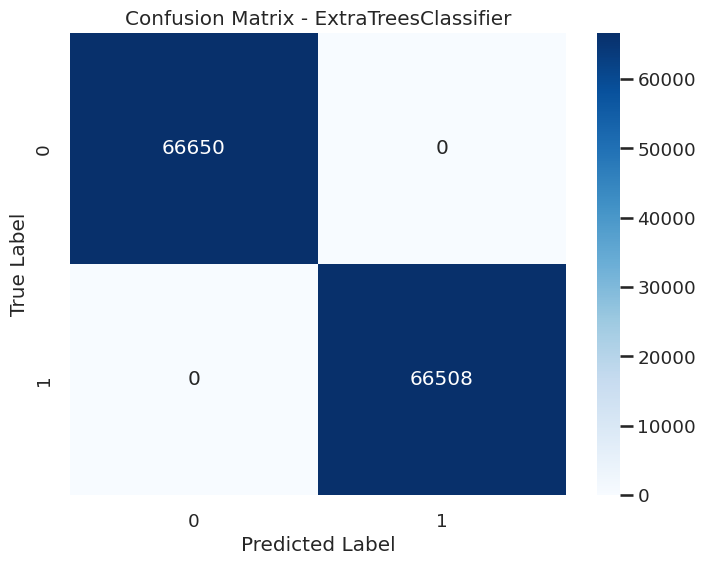

In [ ]:
start_time = time()

ET_grid_search.fit(X_train, y_train)

print(f"Training time: {time() - start_time:.2f} seconds")
print("Best parameters for ExtraTreesClassifier:", ET_grid_search.best_params_)

best_ET = ET_grid_search.best_estimator_
_, ET_results = evaluate_model(best_ET, X_test, y_test, "ExtraTreesClassifier")

all_models_results.append(ET_results)

**Penjelasan**:  
Cell ini melatih model dengan `GridSearchCV`, mencatat waktu pelatihan, menampilkan parameter terbaik, mengevaluasi model terbaik, dan menyimpan hasilnya.

**Kegunaan**:  
- Menemukan model Extra Trees dengan performa terbaik.
- Membandingkan hasil model yang telah di-tuning dengan model lain.

In [ ]:
# save the trained model to a file
joblib.dump(best_ET, '/content/drive/MyDrive/ML/Dataset/ExtraTrees_model.pkl')


['/content/drive/MyDrive/ML/Dataset/ExtraTrees_model.pkl']

**Penjelasan**:  
Cell ini menyimpan model Extra Trees terbaik ke file `.pkl` di Google Drive menggunakan `joblib`.

**Kegunaan**:  
- Memungkinkan penggunaan ulang model tanpa perlu melatih ulang.
- Menyediakan model untuk deployment atau analisis lebih lanjut.

## Kesimpulan
Setiap cell dalam kode ini memiliki peran spesifik dalam pipeline machine learning, mulai dari pemuatan dan preprocessing data, penanganan ketidakseimbangan kelas, encoding dan normalisasi, hingga pelatihan, evaluasi, dan optimasi model. Pipeline ini dirancang untuk mendeteksi akun bot dengan menggunakan model Extra Trees Classifier, dengan langkah-langkah yang sistematis untuk memastikan data bersih, model optimal, dan hasil yang dapat diinterpretasikan.